<a href="https://colab.research.google.com/github/bryandelgado99/Fundamentos-de-IA/blob/main/Clase_05_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase 05 - Aprendizaje No Supervisado (Clustering)
## Fecha: 11/12/2023

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [6]:
#Leemos le archivo
data = pd.read_csv("/content/wine_cluster.csv")

#Limpiamos valores nulos
datos = data.dropna()

#Reiniciamos el indice
datos = datos.reset_index(drop=True)

#Cracterísticas de los datos
print(data.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

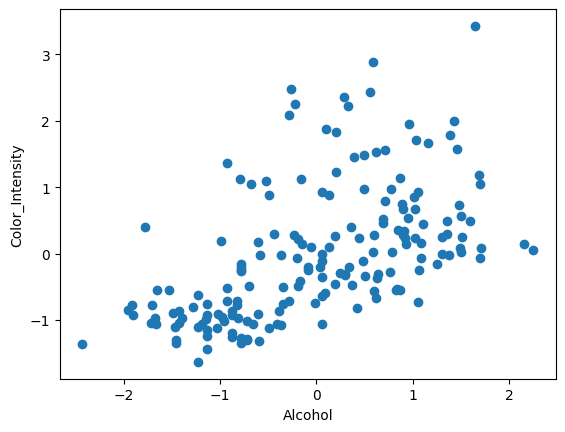

In [19]:
#Separamos las características relevantes
X=datos[['Alcohol', 'Color_Intensity']]

#Normalizamos los valores
X=(X-X.mean())/(X.std())

#Entrenamos el modelo
plt.scatter(X.iloc[:, 0], X.iloc[:, 1])
plt.xlabel("Alcohol")
plt.ylabel("Color_Intensity")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

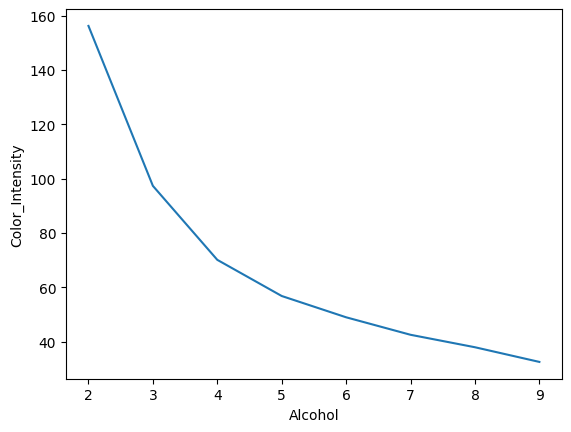

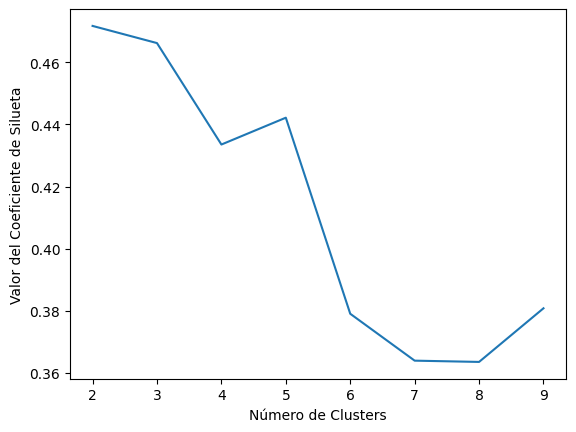

0.43353047830856783
0.4421636821842383


In [27]:
#Calcular la inercia del modelo
k_range = range(2,10)
inercias=[]
siluetas = []

for k in k_range:
  modelo = KMeans(k)
  modelo.fit(X)
  inercias.append(modelo.inertia_)
  #Calculamos la métrica de la silueta para diferentes valores del cluster
  silueta = silhouette_score(X, modelo.labels_)
  siluetas.append(silueta)

#Gráfica de la curva de codo
plt.plot(k_range, inercias) #(x,y)
plt.xlabel("Alcohol")
plt.ylabel("Color_Intensity")
plt.show()

print("\n")

#Graficamos la silueta
plt.plot(k_range, siluetas) #(x,y)
plt.xlabel("Número de Clusters")
plt.ylabel("Valor del Coeficiente de Silueta")
plt.show()
print(siluetas[2])
print(siluetas[3])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


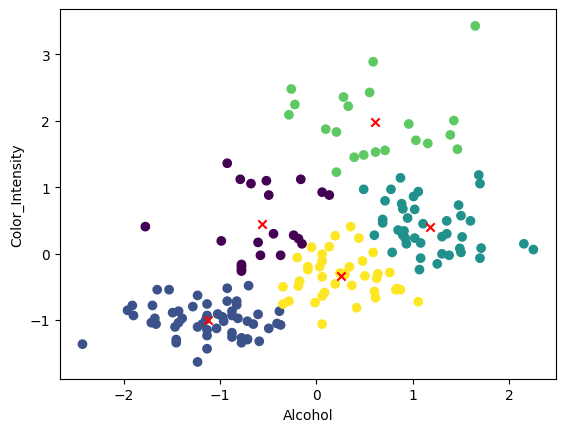

In [31]:
#Creamos el modelo
modelo = KMeans(5)
modelo.fit(X)

#Impresión del centroide
centroide = modelo.cluster_centers_
etiquetas = modelo.labels_

#Gráfico de disperción de clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=etiquetas, cmap='viridis')
plt.scatter(centroide[:,0], centroide[:,1], marker='x', color='red')
plt.xlabel("Alcohol")
plt.ylabel("Color_Intensity")
plt.show()

In [35]:
#Evaluación del modelo
silueta = silhouette_score(X, etiquetas)
calinski = calinski_harabasz_score(X, etiquetas)
davies = davies_bouldin_score(X, etiquetas)
print(silueta)
print(calinski)
print(davies)

print("\n")

#Predicción
datos_nuevos = np.array([[14.5, 8]])
#Normalizar
datos_nuevos = (datos_nuevos-datos_nuevos.mean()/datos_nuevos.std())
prediccion = modelo.predict(datos_nuevos)
print(f"La predicción es {prediccion}")

0.4421636821842383
226.31182398712383
0.8053385780011564
La predicción es [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
